In [1]:
import sys
from pathlib import Path
src_utils_path = Path("../../src/utils")
sys.path.append(str(src_utils_path))
import metrics as mjo
import yaml  

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import numpy as np
import xarray as xr 

In [2]:
lat_range = 20
lead = 35
memory_last = 0

with open('./best_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

output_path = config['prediction_save_path']

fn_list = []

import re

for exp_num in range(1, 17):
    fn = re.sub(r"exp\d+/", f"exp{exp_num}/", output_path)
    fn_list.append(fn)

# bcc, rmse = mjo.get_skill_all_leads_parallel(
#     'ROMI',
#     fn_list=fn_list,
#     rule='Iamp>1.0',
#     month_list=None,
#     datesta='2016-01-01',
#     dateend='2021-12-31',
#     lead_max=lead,
#     exp_list=np.arange(1, 5),
#     Fnmjo=config["data"]["target_path"]
# )

# bccv, rmsev = mjo.get_skill_all_leads_parallel(
#     'ROMI',
#     fn_list=fn_list,
#     rule='Iamp>1.0',
#     month_list=None,
#     datesta='2010-01-01',
#     dateend='2015-12-31',
#     lead_max=lead,
#     exp_list=np.arange(1, 5),
#     Fnmjo=config["data"]["target_path"]
# )

In [3]:
bcc_ens, _ = mjo.get_skill_all_leads_ensemble_mean(
    fn_list=fn_list,
    exp_num_list=np.arange(1, 17),
    lat_lim=20,
    Fnmjo=config["data"]["target_path"]
)

In [ ]:
# bccs = []
# # bccvs = []
# for exp_num in range(1, 5):
#     bccs.append(bcc[exp_num])
#     # bccvs.append(bccv[exp_num])

# bccs = np.array(bccs)
# # bccvs = np.array(bccvs)


In [4]:
bcc_ens

array([0.8852738 , 0.88286614, 0.87243915, 0.8548165 , 0.82990235,
       0.8005383 , 0.77641886, 0.757206  , 0.74108344, 0.7272337 ,
       0.7155542 , 0.7050199 , 0.694419  , 0.6836521 , 0.67265475,
       0.66189176, 0.65142465, 0.6409731 , 0.6300784 , 0.6176003 ,
       0.6030049 , 0.58742064, 0.57172793, 0.555329  , 0.53826725,
       0.5223281 , 0.50698715, 0.49274355, 0.4792868 , 0.46696314,
       0.45527297, 0.44307446, 0.43031985, 0.41878328, 0.4064599 ,
       0.3931632 ], dtype=float32)

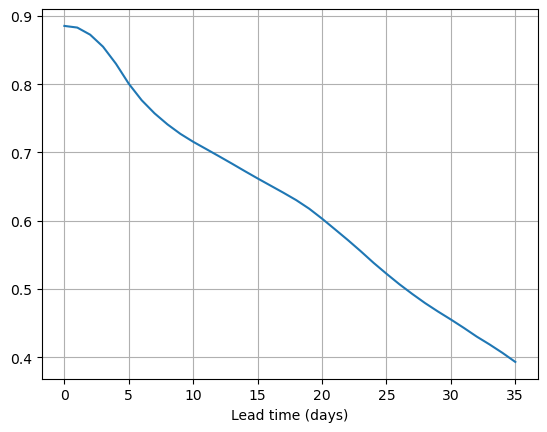

In [5]:
plt.plot(np.arange(lead+1), bcc_ens.T, linestyle='-')
# plt.plot(np.arange(lead+1), bccvs.T, linestyle='--')

plt.xlabel('Lead time (days)')
plt.grid()

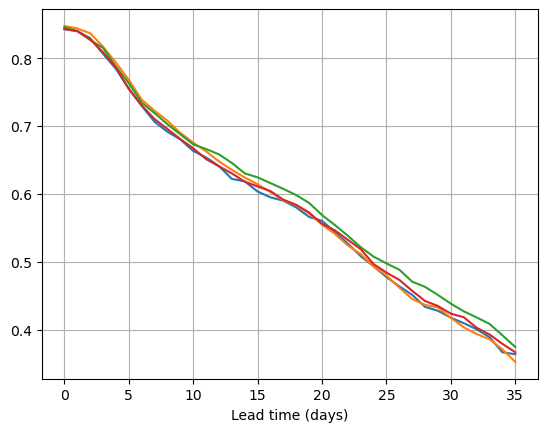

In [6]:
plt.plot(np.arange(lead+1), bccs.T, linestyle='-')
# plt.plot(np.arange(lead+1), bccvs.T, linestyle='--')

plt.xlabel('Lead time (days)')
plt.grid()